<a href="https://colab.research.google.com/github/iborgstedt2848/ML_G84_G2_P2/blob/main/segunda_pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda Práctica

**Autores:**

---


Luis Enrique Valero Montero - Gr. 85 - 100495982

Isabelle Borgstedt - Gr. 84 - 100559990

Link to Respository: https://github.com/iborgstedt2848/ML_G84_G2_P2/tree/main

# Eligiendo el mejor scaler a traves de PCA:

Primero, vamos a visualizar los diferentes scalers: MinMaxScaler, StandardScaler, y RobustScaler usando gráficos que muestran los clusters. Después, podemos elegir el mejor basado en las métricas y los gráficos.

          PC1       PC2  class
0    0.222314 -0.451988      1
1    0.132084 -1.217733      1
2   -0.028215 -1.368021      1
3   -0.139683 -1.337110      1
4    0.881124 -1.364596      1
..        ...       ...    ...
205 -1.080211 -0.696041      3
206 -1.675987  0.056040      3
207 -0.798936  0.641682      3
208 -1.436453 -0.116253      3
209 -1.168643  0.217147      3

[210 rows x 3 columns]


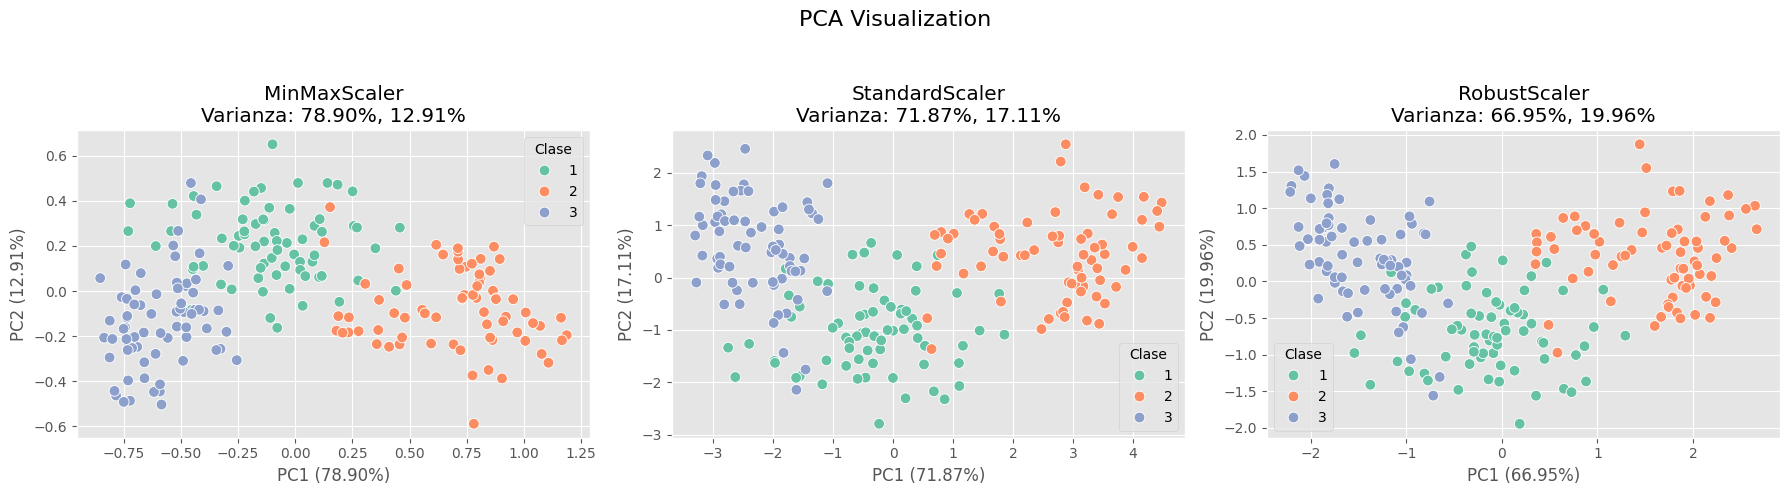

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# cargar los datos
df = pd.read_csv("semillas.csv")
X = df.drop(columns=['clase'])
y = df['clase']

# semilla para la reproducibilidad
random_seed = 559990

# dictionario de scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('PCA Visualization', fontsize=16)

# probar cada scaler y realizar PCA
for ax, (name, scaler) in zip(axes, scalers.items()):
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=2, random_state=random_seed))
    ])

    X_pca = pipeline.fit_transform(X)
    pca = pipeline.named_steps['pca']
    explained_variance = pca.explained_variance_ratio_

    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['class'] = y

    sns.scatterplot(
        data=pca_df,
        x='PC1', y='PC2',
        hue='class',
        palette='Set2',
        ax=ax,
        s=60
    )

    ax.set_title(f"{name}\nVarianza: {explained_variance[0]:.2%}, {explained_variance[1]:.2%}")
    ax.set_xlabel(f"PC1 ({explained_variance[0]:.2%})")
    ax.set_ylabel(f"PC2 ({explained_variance[1]:.2%})")
    ax.legend().set_title('Clase')

# para demostrar la reduccion de dimensionalidad que nos hico PCA
print(pca_df)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()



También podemos calcular la efectivdad de cada scaler con las métricas Silhouette Score, Davies-Bounldin Index, y Calinski Harabasz score para obtener una respuesta más objetiva del rendimiento de los scalers.

In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

results = []

for name, scaler in scalers.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=2, random_state=random_seed))
    ])

    X_scaled_pca = pipeline.fit_transform(X)

    # correr kmeans con k=3
    kmeans = KMeans(n_clusters=3, random_state=random_seed)
    labels = kmeans.fit_predict(X_scaled_pca)

    # evaluar las métricas
    silhouette = silhouette_score(X_scaled_pca, labels)
    db_index = davies_bouldin_score(X_scaled_pca, labels)
    ch_index = calinski_harabasz_score(X_scaled_pca, labels)

    results.append({
        'Scaler': name,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Index': ch_index
    })

# convertirse en df
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Silhouette Score', ascending=False))


           Scaler  Silhouette Score  Davies-Bouldin Index  \
0    MinMaxScaler          0.503160              0.697186   
1  StandardScaler          0.493430              0.706673   
2    RobustScaler          0.489777              0.699397   

   Calinski-Harabasz Index  
0               464.844797  
1               397.301078  
2               360.897259  


Silhouette Score: Mide qué tan bien se ajusta un punto a su propio clúster en comparación con otros clusters. Los valores cercanos a 1 indican un mejor agrupamiento.

Davies-Bouldin Index: Mide la similitud promedio entre cada cluster y el cluster más similar. Cuanto menor sea el valor, mejor.

Calinski-Harabasz Index: Relación entre la dispersión entre clusters y la dispersión interna de los clusters. Cuanto mayor sea el valor, mejor.

Todos las métricas muestran que MinMaxScaler es el mejor porque tiene el Silhouette Score más alto, el Davies-Bouldin Index más bajo, t el Calinski-Harabasz Index más alto.

Ahora que sabemos cual es el mejor scaler para elegir, MinMax, vamos a recrear el dataframe final que va a ser utilizado en nuestros algoritmos de clustering.

In [28]:
mejor_scaler = MinMaxScaler()
pipeline = Pipeline([
    ('scaler', mejor_scaler),
    ('pca', PCA(n_components=2, random_state=random_seed))
])

X_scaled_pca = pipeline.fit_transform(X)

pca_df = pd.DataFrame(X_scaled_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y

X_pca = pca_df.drop(columns=['class'])

#visualizamos el dataframe
print(pca_df)
print(X_pca)

          PC1       PC2  class
0    0.075029  0.129691      1
1   -0.024301  0.364120      1
2   -0.149375  0.456497      1
3   -0.180881  0.440557      1
4    0.250589  0.441297      1
..        ...       ...    ...
205 -0.533393  0.201720      3
206 -0.703762 -0.059483      3
207 -0.336222 -0.085931      3
208 -0.606683 -0.014199      3
209 -0.498803 -0.054545      3

[210 rows x 3 columns]
          PC1       PC2
0    0.075029  0.129691
1   -0.024301  0.364120
2   -0.149375  0.456497
3   -0.180881  0.440557
4    0.250589  0.441297
..        ...       ...
205 -0.533393  0.201720
206 -0.703762 -0.059483
207 -0.336222 -0.085931
208 -0.606683 -0.014199
209 -0.498803 -0.054545

[210 rows x 2 columns]


# Clustering:

## K-Means:

Vamos a usar K-Means para agrupar los datos en clusters. Vamos a determinar cuántos clusters son necesarios para obtener un buen resultado usando clusters con codo y silueta.

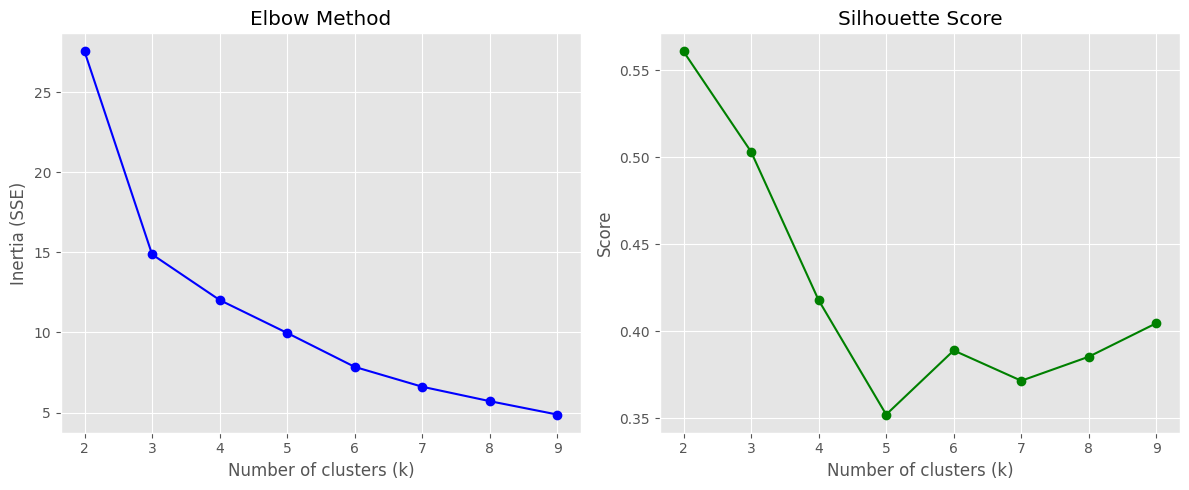

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=559990)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'go-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

Para clusters con codo, graficamos el número de clusters contra la inercia (SSE) que es una medida de la compacidad de los puntos de datos con respecto al centroide. Estamos buscando el "codo" del gráfico porque esto es el punto en lo que el reducción de SSE comienza a estabilizarse.

Para clusters con silueta, graficamos el número de clusters contra la puntuación que es una medida del ajuste de cada punto en su cluster (en comparación con otros clusteres). Estamos buscando números más grades, más cercos a uno.

Aunque k=2 es más cerco a uno según Silhouette score, elegimos k=3 para cumplir una solución intermedia entre los dos.

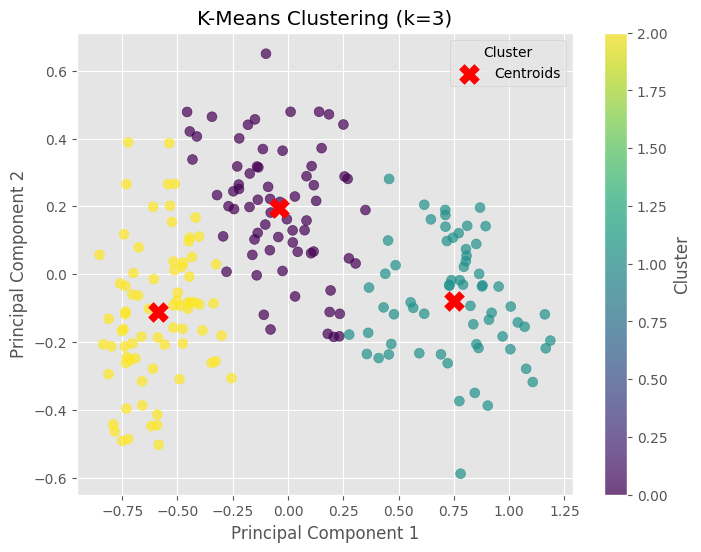

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# kmeans clustering
k_best = 3
kmeans = KMeans(n_clusters=k_best, random_state=559990)
kmeans.fit(pca_df[['PC1', 'PC2']])
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7
)

plt.scatter(
    kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', s=200, marker='X', label='Centroids'
)

plt.title(f'K-Means Clustering (k={k_best})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label="Cluster")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Hierarchical Clustering/Dendrograms:

Entonces vamos a usar Hierarchical Clustering/Dendrograms para agrupar los datos en clusters. Vamos a determinar cuántos clusters son necesarios para obtener un buen resultado usando funciones de linkage.

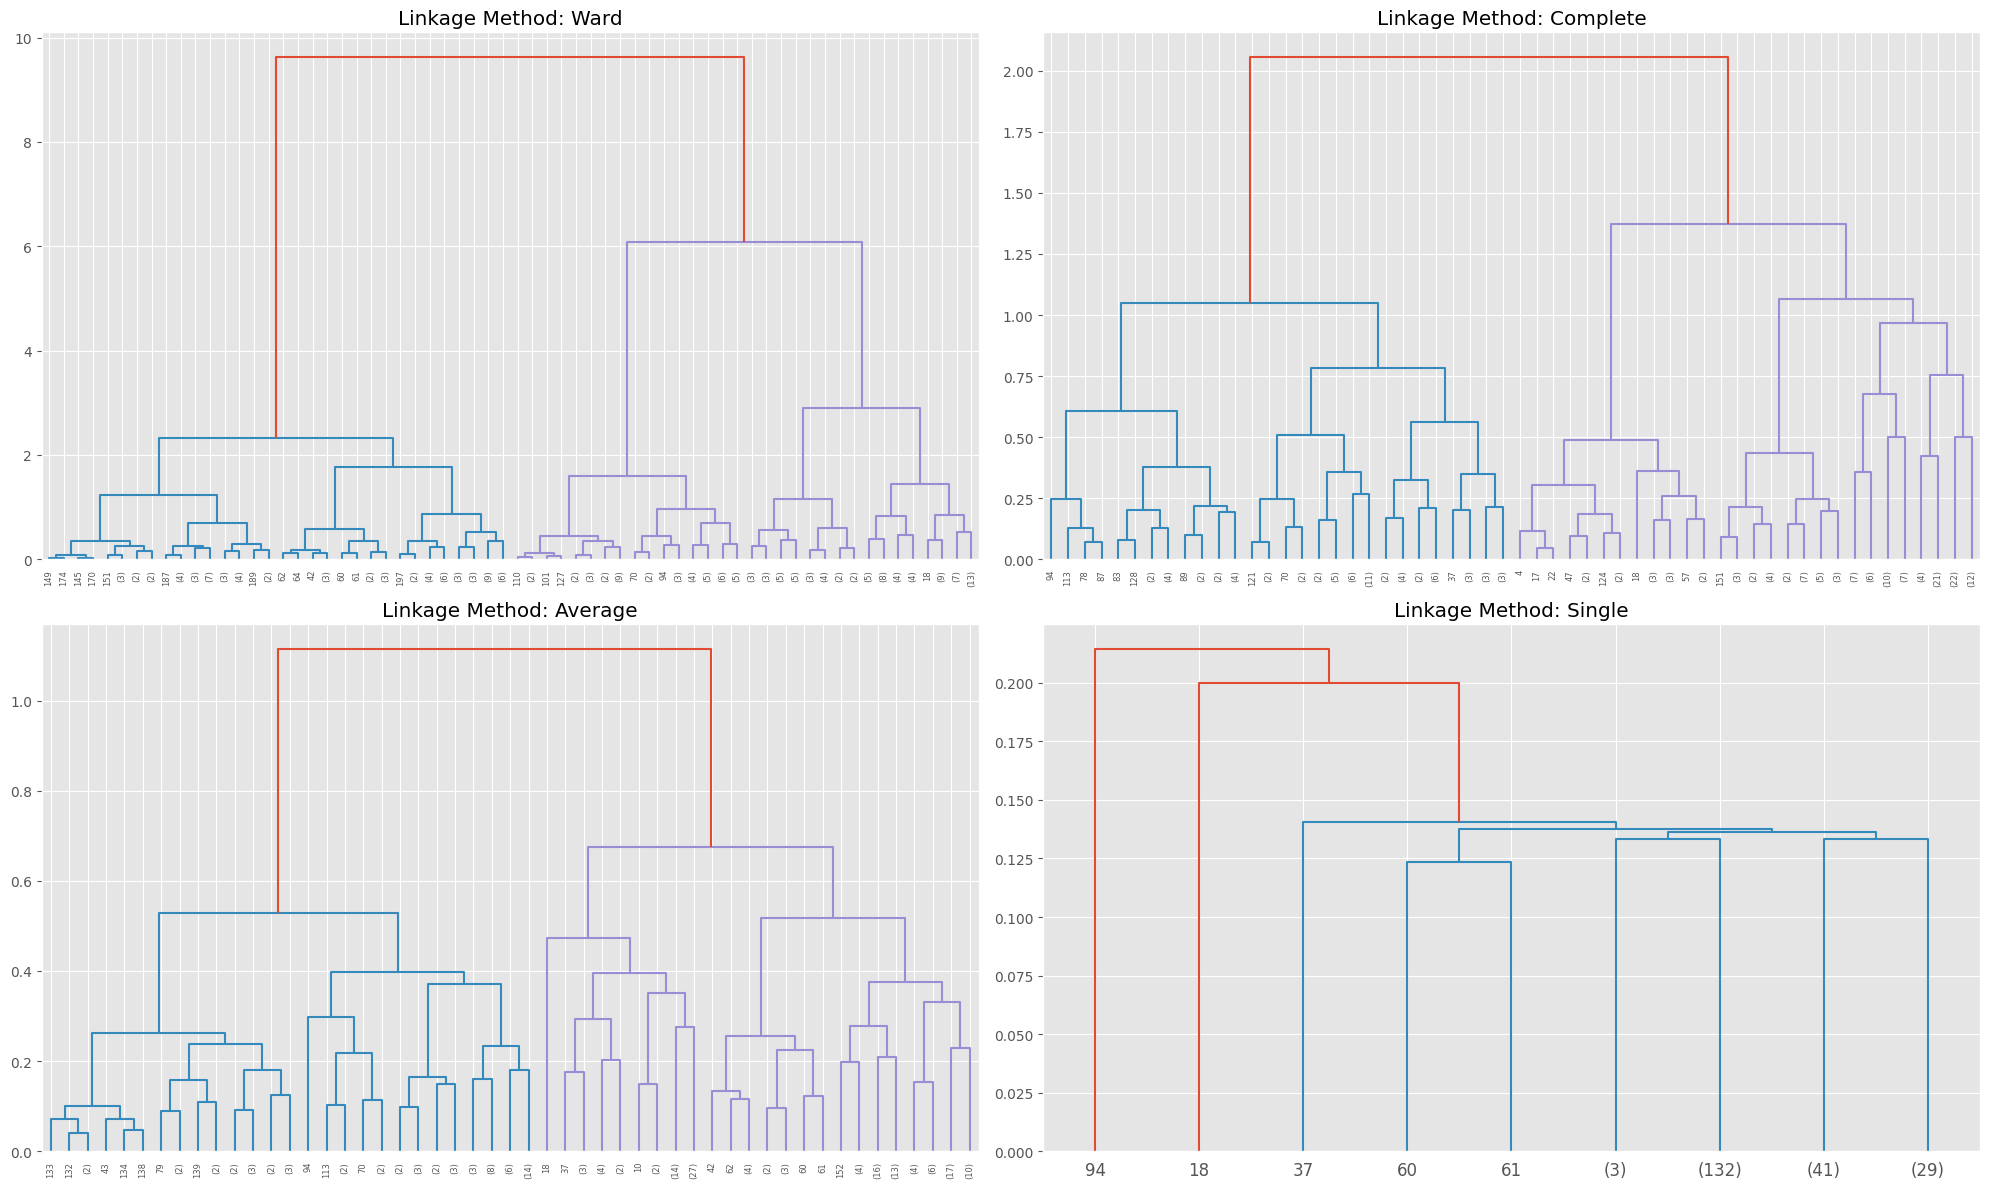

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

linkage_methods = ['ward', 'complete', 'average', 'single']

# dendrograms
plt.figure(figsize=(20, 12))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    Z = linkage(pca_df[['PC1', 'PC2']], method=method)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f'Linkage Method: {method.capitalize()}')

plt.tight_layout()
plt.show()

Está claro que Ward es el mejor función de linkeage porque es el más simétrico. Ward reduce la varianza y a menudo su rendimiento es similar a K-Means.

También podemos ver que Ward crea 3 clusters. Hay un hueco vertical entre el nivel 3 y el nivel 2 que signifca que 3 es el mejor. El uso de 2 clusters combinaría clusters con demasiada separación.

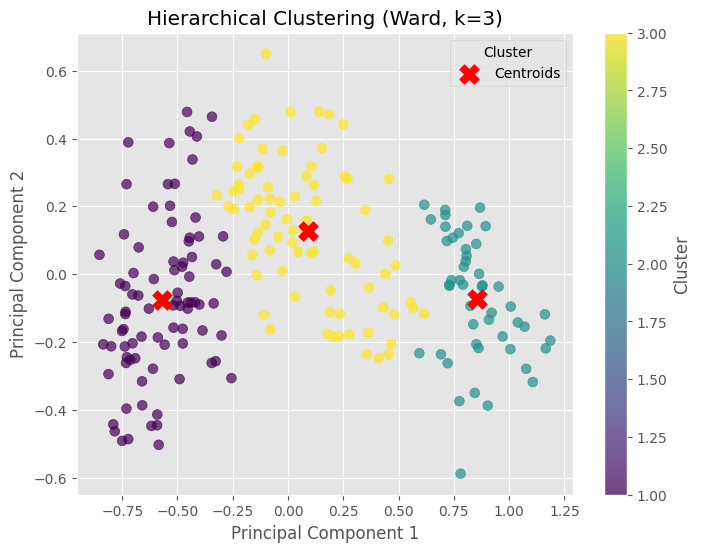

In [32]:
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np

# hierarchical clustering
Z = linkage(pca_df[['PC1', 'PC2']], method='ward')
hier_clusters = fcluster(Z, t=3, criterion='maxclust')

# calcular centroids
hier_centroids = np.array([pca_df[hier_clusters == i][['PC1', 'PC2']].mean(axis=0) for i in range(1, 4)])
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=hier_clusters,
    cmap='viridis',
    s=50,
    alpha=0.7
)

plt.scatter(
    hier_centroids[:, 0],
    hier_centroids[:, 1],
    c='red', s=200,
    marker='X',
    label='Centroids'
)

plt.title('Hierarchical Clustering (Ward, k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label="Cluster")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## DBSCAN:

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

DBSCAN found 1 clusters and 0 noise points.


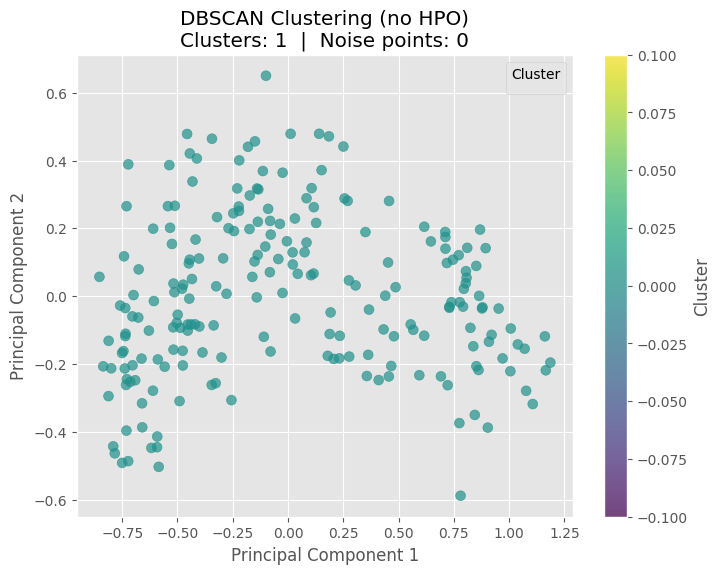

In [34]:
#sin HPO, valores de eps y min_samples de default
modelo_dbscan = DBSCAN()
modelo_dbscan.fit(X_pca)
labels = modelo_dbscan.labels_

#como DBSCAN no calcula los numeros de clusters lo tenemos que calcular nostros
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#calculamos la cantidad de puntos que considera como outliers
n_noise = list(labels).count(-1)

# Print summary
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")

def plot_dbscan(n_clusters, n_noise):
  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(
      X_pca["PC1"], X_pca["PC2"],
      c=labels,
      cmap='viridis',
      s=50,
      alpha=0.7
  )

  plt.title(f'DBSCAN Clustering (no HPO)\nClusters: {n_clusters}  |  Noise points: {n_noise}')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.colorbar(scatter, label="Cluster")
  plt.legend(title='Cluster')  # No centroids in DBSCAN, legend is just a placeholder
  plt.grid(True)
  plt.show()
plot_dbscan(n_clusters, n_noise)

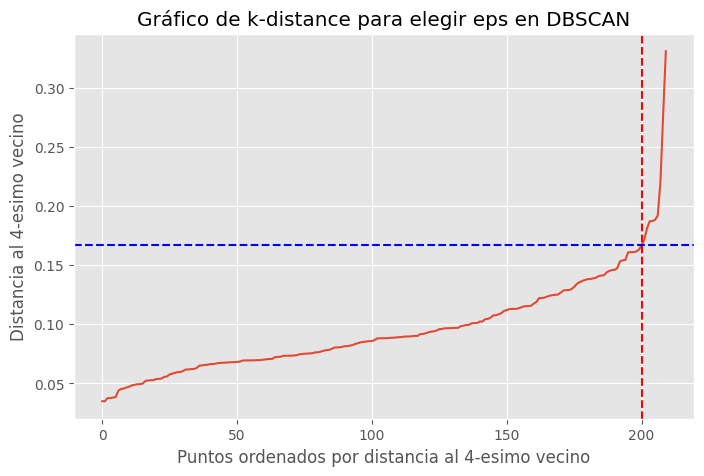

x_point=200 y_value=0.16673162014672133


In [35]:
from sklearn.neighbors import NearestNeighbors
# Step 1: Set min_samples (usually 5)
min_samples = 5

#usamos nearestneighbors para calcular las distancias
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_pca)
distances, indices = nn.kneighbors(X_pca)

#ordenamos las distancias en un numpy array
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

x_point = 200
y_value = sorted_distances[x_point]

#dibuajmos las distancias sorteadas
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances)
plt.xlabel('Puntos ordenados por distancia al {}-esimo vecino'.format(min_samples-1))
plt.ylabel('Distancia al {}-esimo vecino'.format(min_samples-1))
plt.title('Gráfico de k-distance para elegir eps en DBSCAN')
plt.axvline(x=x_point, color='r', linestyle='--')
plt.axhline(y=y_value, color='b', linestyle='--')
plt.grid(True)
plt.show()
print(f'{x_point=} y_value={y_value}')

Although we see that elbow is approximately at the point 200, we don't such want to try

In [36]:
eps_values = np.arange(0.1174, 0.1667, 0.0005)
count = 0
for eps in eps_values:
    modelo = DBSCAN(eps=eps, min_samples=5)
    labels = modelo.fit_predict(X_pca)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps = {eps:.4f} → Clusters: {n_clusters}, Noise: {n_noise}")
    count += 1

print(f"Total de iteraciones: {count}")


eps = 0.1174 → Clusters: 3, Noise: 23
eps = 0.1179 → Clusters: 3, Noise: 23
eps = 0.1184 → Clusters: 3, Noise: 23
eps = 0.1189 → Clusters: 3, Noise: 23
eps = 0.1194 → Clusters: 3, Noise: 23
eps = 0.1199 → Clusters: 3, Noise: 23
eps = 0.1204 → Clusters: 3, Noise: 23
eps = 0.1209 → Clusters: 3, Noise: 21
eps = 0.1214 → Clusters: 3, Noise: 21
eps = 0.1219 → Clusters: 3, Noise: 21
eps = 0.1224 → Clusters: 3, Noise: 20
eps = 0.1229 → Clusters: 3, Noise: 20
eps = 0.1234 → Clusters: 3, Noise: 20
eps = 0.1239 → Clusters: 3, Noise: 19
eps = 0.1244 → Clusters: 3, Noise: 19
eps = 0.1249 → Clusters: 3, Noise: 19
eps = 0.1254 → Clusters: 3, Noise: 16
eps = 0.1259 → Clusters: 3, Noise: 16
eps = 0.1264 → Clusters: 3, Noise: 15
eps = 0.1269 → Clusters: 3, Noise: 15
eps = 0.1274 → Clusters: 3, Noise: 15
eps = 0.1279 → Clusters: 3, Noise: 15
eps = 0.1284 → Clusters: 3, Noise: 15
eps = 0.1289 → Clusters: 3, Noise: 15
eps = 0.1294 → Clusters: 3, Noise: 15
eps = 0.1299 → Clusters: 3, Noise: 14
eps = 0.1304

DBSCAN found 3 clusters and 9 noise points.


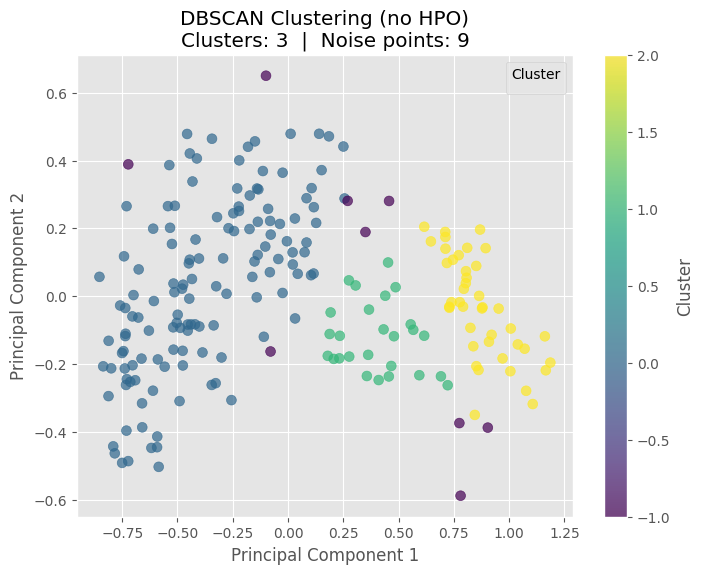

In [37]:
modelo_dbscan = DBSCAN(
    eps = 0.1379,
    min_samples = 5,
    metric = 'euclidean',
)

modelo_dbscan.fit(X_pca)
labels = modelo_dbscan.labels_

#como DBSCAN no calcula los numeros de clusters lo tenemos que calcular nostros
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#calculamos la cantidad de puntos que considera como outliers
n_noise = list(labels).count(-1)

# Print summary
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")

plot_dbscan(n_clusters, n_noise)

# Análisis:

## Una Comparación:

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

pca_df = pca_df[['PC1', 'PC2']]

# establecer número de clusters = 3
kmeans = KMeans(n_clusters=3, random_state=559990)
kmeans_labels = kmeans.fit_predict(pca_df)

# hierarchical clustering: n_clusters = 3 y ward
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hc.fit_predict(pca_df)

def evaluate_clustering(X, labels, name):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    print(f"{name} Clustering:")
    print(f"Silhouette Score: {sil:.3f}")
    print(f"Davies–Bouldin Index: {db:.3f}")
    print(f"Calinski–Harabasz Score: {ch:.3f}")
    print("-" * 40)

evaluate_clustering(pca_df, kmeans_labels, "K-Means")
evaluate_clustering(pca_df, hierarchical_labels, "Hierarchical")


K-Means Clustering:
Silhouette Score: 0.503
Davies–Bouldin Index: 0.697
Calinski–Harabasz Score: 464.845
----------------------------------------
Hierarchical Clustering:
Silhouette Score: 0.471
Davies–Bouldin Index: 0.729
Calinski–Harabasz Score: 396.488
----------------------------------------


Según esta comparación, el rendimiento de K-Means es un poco mejor que el rendimiento de Hierarchical clustering porque K-Means tiene un Davies-Bouldin Index más pequeño y un Calinski-Harabasz Score más grande.



Vamos a empezar con una inspección visual.

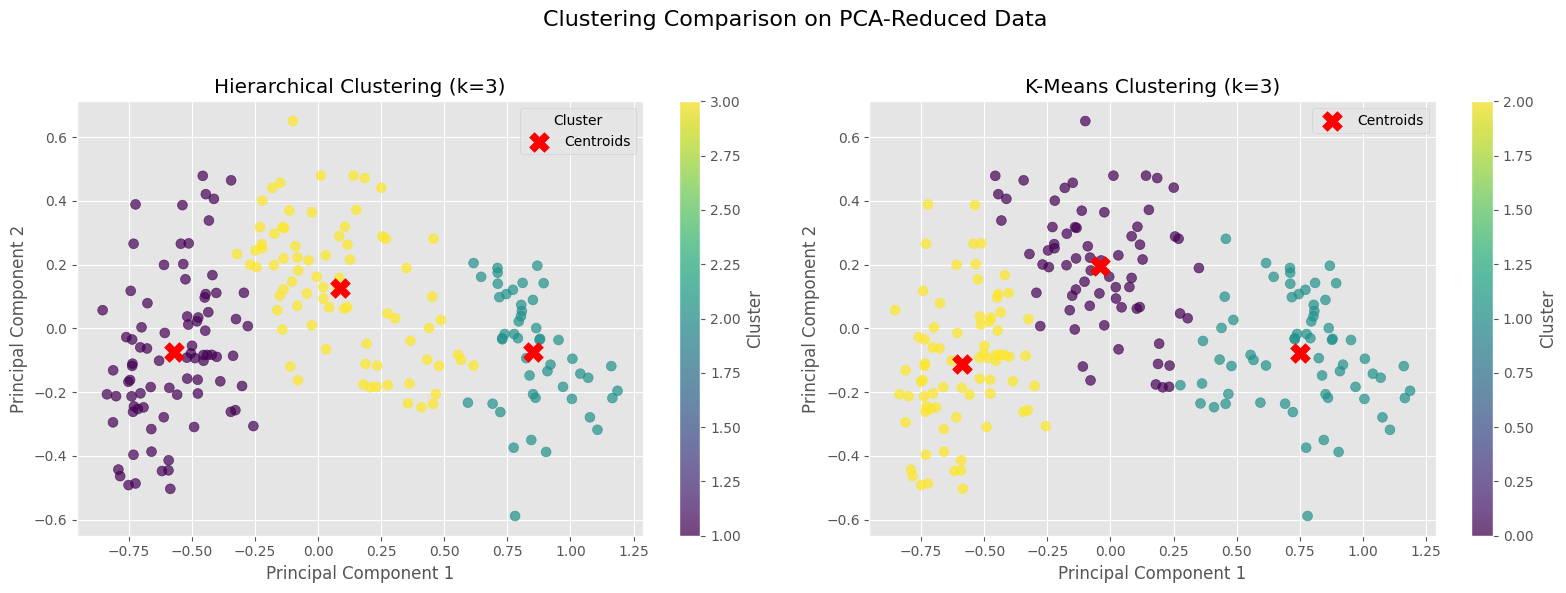

In [39]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# hierarchical clustering
Z = linkage(pca_df[['PC1', 'PC2']], method='ward')
hier_clusters = fcluster(Z, t=3, criterion='maxclust')
hier_centroids = np.array([
    pca_df[hier_clusters == i][['PC1', 'PC2']].mean(axis=0) for i in range(1, 4)
])

# kmeans clustering
k_best = 3
kmeans = KMeans(n_clusters=k_best, random_state=559990)
kmeans.fit(pca_df[['PC1', 'PC2']])
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Clustering Comparison on PCA-Reduced Data", fontsize=16)

# hierarchical plot
scatter1 = axes[0].scatter(
    pca_df['PC1'], pca_df['PC2'], c=hier_clusters, cmap='viridis', s=50, alpha=0.7
)
axes[0].scatter(hier_centroids[:, 0], hier_centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
axes[0].set_title('Hierarchical Clustering (k=3)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Cluster')
axes[0].grid(True)
fig.colorbar(scatter1, ax=axes[0], label="Cluster")

# kmeans plot
scatter2 = axes[1].scatter(
    pca_df['PC1'], pca_df['PC2'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7
)
axes[1].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
axes[1].set_title(f'K-Means Clustering (k={k_best})')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend()
axes[1].grid(True)
fig.colorbar(scatter2, ax=axes[1], label="Cluster")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Declaracion de uso de Inteligencia Artificial Generativa:

Nosotros declaramos el uso de inteligencia artificial generativa para usos especificos en esta practica. En nuestro caso, utilizabamos IA generativa como ChatGPT para depurar nuestro codigo ya que implementaciones de algoritmos de clustering con la libreria sci-kit learn es algo con lo que no somo familiares con ello. Nos ha ayudado a resolver "bugs" que nos salia al realizar la optimizacion de los hiperparametros para estos algoritmos. Tambien nos ha ayudado a resforzar nuestros conocimientos de clase con mayor facilidad. Ha sido util en ayudandonos a crear grafos para representar los resultados de clustering ya que no tenemos muchas experienca o conocimientos sobre libreries como seaborn y matplotlib.
